
# Niblack and Sauvola Thresholding


클래스, 함수, 인풋, 아웃풋, 기능 정도만 
Niblack and Sauvola thresholds are local thresholding techniques that are
useful for images where the background is not uniform, especially for text
recognition [1]_, [2]_. Instead of calculating a single global threshold for
the entire image, several thresholds are calculated for every pixel by using
specific formulae that take into account the mean and standard deviation of the
local neighborhood (defined by a window centered around the pixel).

Here, we binarize an image using these algorithms compare it to a common global
thresholding technique. Parameter `window_size` determines the size of the
window that contains the surrounding pixels.

.. [1] Niblack, W (1986), An introduction to Digital Image
       Processing, Prentice-Hall.
.. [2] J. Sauvola and M. Pietikainen, "Adaptive document image
       binarization," Pattern Recognition 33(2),
       pp. 225-236, 2000.
       :DOI:`10.1016/S0031-3203(99)00055-2`



c:\users\user\anaconda2\envs\tensorflow-gpu\lib\site-packages\skimage\util\arraycrop.py:177: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = ar[slices]


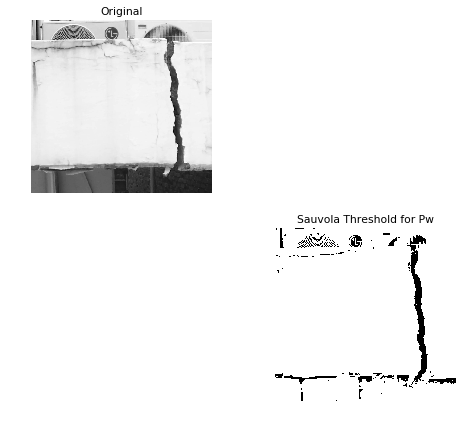

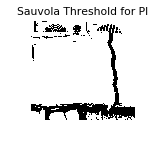

In [19]:
# 1. Image binarization(Sauvola's method) using Pw and Pl, respectively

import matplotlib
import matplotlib.pyplot as plt
import cv2
from skimage import io
from skimage import data
from skimage.color import rgb2gray
from skimage.data import page
from skimage.filters import (threshold_sauvola)
from PIL import Image

matplotlib.rcParams['font.size'] = 9

# Upload the image
img = cv2.imread("../../Desktop/frame320.jpg")

# Convert the image from RGB to grayscale
img_gray = rgb2gray(img)

# 논문에선 각각 70,180이었으나 여기선 홀수 input만 가능
window_size_Pw = 71
window_size_Pl = 181
thresh_sauvola_Pw = threshold_sauvola(img_gray, window_size=window_size_Pw, k=0.42)
thresh_sauvola_Pl = threshold_sauvola(img_gray, window_size=window_size_Pl, k=0.18)

#Below are the converted images through Sauvola's method.
# _bw will contain 0 or 1, not true or false. bw means black or white.
binary_sauvola_Pw = img_gray > thresh_sauvola_Pw
binary_sauvola_Pl = img_gray > thresh_sauvola_Pl
binary_sauvola_Pw_bw = img_gray > thresh_sauvola_Pw
binary_sauvola_Pl_bw = img_gray > thresh_sauvola_Pl

binary_sauvola_Pw_bw.dtype = 'uint8'
binary_sauvola_Pl_bw.dtype = 'uint8'

binary_sauvola_Pw_bw *= 255
binary_sauvola_Pl_bw *= 255

io.imsave('../../Desktop/Sauvola_Pw.jpg', binary_sauvola_Pw_bw)
io.imsave('../../Desktop/Sauvola_Pl.jpg', binary_sauvola_Pl_bw)

plt.figure(figsize=(8, 7))
plt.subplot(2, 2, 1)
plt.imshow(img_gray, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola_Pw_bw, cmap=plt.cm.gray)
plt.title('Sauvola Threshold for Pw')
plt.axis('off')

plt.show()

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola_Pl_bw, cmap=plt.cm.gray)
plt.title('Sauvola Threshold for Pl')
plt.axis('off')

plt.show()

In [20]:
print(type(binary_sauvola_Pw))
print(binary_sauvola_Pw)

<class 'numpy.ndarray'>
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


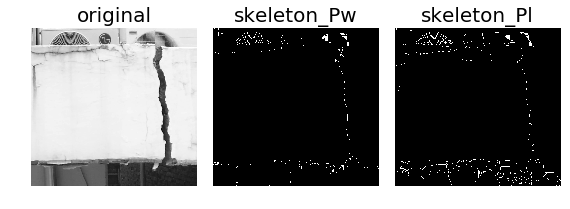

In [21]:
# 2. Extract the skeletons of each images

from skimage.morphology import skeletonize
from skimage.util import invert

# Invert the binarized images
img_Pw = invert(binary_sauvola_Pw)
img_Pl = invert(binary_sauvola_Pl)

# Below are skeletonized images
skeleton_Pw = skeletonize(img_Pw)
skeleton_Pl = skeletonize(img_Pl)

# Convert true/false to 1/0 to save it as image
skeleton_Pw.dtype = 'uint8'
skeleton_Pl.dtype = 'uint8'

skeleton_Pw *= 255
skeleton_Pl *= 255

# display results
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(img_gray, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton_Pw, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton_Pw', fontsize=20)

io.imsave("../../Desktop/skeleton_Pw.jpg", skeleton_Pw)

ax[2].imshow(skeleton_Pl, cmap=plt.cm.gray)
ax[2].axis('off')
ax[2].set_title('skeleton_Pl', fontsize=20)

io.imsave("../../Desktop/skeleton_Pl.jpg", skeleton_Pl)

fig.tight_layout()
plt.show()

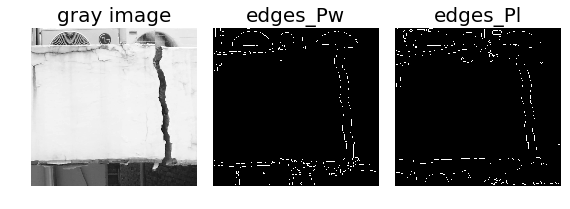

In [27]:
# 3. Detect the edges of each images
### edge detection 할 때, 좋은 parameter를 찾아야 한다. 지금은 edge가 너무 두꺼움 (overestimation됨) ###
import numpy as np
from scipy import ndimage as ndi
from skimage import feature

# Compute the Canny filter for two values of sigma
edges_Pw = feature.canny(binary_sauvola_Pw)
edges_Pl = feature.canny(binary_sauvola_Pl)

edges_Pw.dtype = 'uint8'
edges_Pl.dtype = 'uint8'

edges_Pw *= 255
edges_Pl *= 255

io.imsave("../../Desktop/edges_Pw.jpg", edges_Pw)
io.imsave("../../Desktop/edges_Pl.jpg", edges_Pl)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('gray image', fontsize=20)

ax2.imshow(edges_Pw, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('edges_Pw', fontsize=20)

ax3.imshow(edges_Pl, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('edges_Pl', fontsize=20)

fig.tight_layout()

plt.show()

In [ ]:
'''
1. 어떻게 skeletion의 direction을 추출할 것인가 -> 가장 정확한 방법을 찾아야 함 -> 잘못 세면 overestimation 되기 십상
2. direction만 잘 잡는다면 width를 계산하는 것은 오히려 어렵지 않다
3. skeleton을 추출한 이미지와 edge를 추출한 이미지에 함께 접근해가며 픽셀마다 width를 매기면 됨
4. 여기서 수 많은 width들 중 최종 width는 어떻게 정할 것인지가 또 다른 문제가 됨
'''